# $\color{Blue}{\text{Breaking of universality - Correlated teachers}}$

In this notebook we reproduce the plots in Figure 3: Breaking of universality for teachers that correlate with the structure. 


First we import different scientific computing Python packages, moreover we have built different functions we will need in the scripts *theoryutils.py* & *simulation_utils.py*

In [1]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from theory_utils import *
from scipy.linalg import sqrtm
from simulation_utils import *

## Description of the experiment

Consider now a 2-cluster GMM: $$x_{\mu} \sim p_+\mathcal{N}(\mu_+,\Sigma_+) + (1-p_+)p_+\mathcal{N}(\mu_-,\Sigma_-) \qquad x_{\mu} \in \mathbb{R}^d$$

Consider a simple case in which we have opposite means and identity covariance. The relevant variables in the code are:
- $\mu_+$ -> *mean_plus* 
- $\mu_-$ -> *mean_minus*
- $\Sigma_+^{1/2}$ -> *Tplus*
- $\Sigma_-^{1/2}$ -> *Tminus*

In [5]:
d,p = 1000,1000  ; p1 = 0.5 
Psi = np.eye(d) ;  scale = 1 
mean_plus = np.ones(d) ; mean_minus = -np.ones(d)
mean_gcm = np.zeros(d)
Tplus = sqrtm(Psi) ; Tminus = Tplus
gmm_params = [mean_plus , mean_minus , Tplus, Tminus , p1]

We fix the relevant hypermarameters in the ERM fit: $(\alpha,\lambda,\Delta)$

In [ ]:
lamb = 0.7 ; K = 2  ; alphs = np.linspace(1.2,1.2,1) ; noise = 0

Now we will vary the teacher vector for a fixed value of the parameter above in the following way:
$$ \theta_0 = \Omega \mu_{\perp} + \sqrt{1-\Omega ^2}\mu_{+}$$

The parameter $\Omega$ is the cosine distance between the teacher vector and the cluster mean, it measure the uncorrelation between the learning task and the data structure:

In [ ]:
omegas = np.linspace(0,1,100) ; omegas_gem = []
perp_vec = np.ones(d) ; perp_vec[0:int(d/2)] = -1

## Run experiments

Now for each cosine distance $\Omega$ we compute:
- The theoretical prediction for the performance of a Gaussian model 
- The theoretical prediction for the performance of a GMM
- The performance of ERM under GMM assumption for the data

In [ ]:
rep_gmm_plus , rep_gcm , rep_gmm_minus , simulation_gmm = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
for i,t in enumerate(omegas):
    theta = t*perp_vec + np.sqrt(1-t**2)*np.ones(d)
    ###  GMM  ### 
    rep_gmm_plus = pd.concat([rep_gmm_plus,replica_ridge(alphs,Psi*scale,Psi*scale,Psi*scale,theta, lamb=lamb*scale, omega=0, Delta=0,
              mean = mean_plus, mean0 = mean_plus ,noise=0)])
    rep_gmm_minus = pd.concat([rep_gmm_minus,replica_ridge(alphs,Psi*scale,Psi*scale,Psi*scale,theta, lamb=lamb*scale, omega=0, Delta=0,
              mean = mean_minus, mean0 = mean_minus ,noise=0)])
    ###  GCM  ###
    if i == 0:
        aux_rep = replica_ridge(alphs,Psi*scale,Psi*scale,Psi*scale,theta, lamb=lamb*scale, omega=0, Delta=0,
              mean = mean_gcm, mean0 = mean_gcm ,noise=0)
    rep_gcm = pd.concat([rep_gcm,aux_rep])
    ### Simul GMM ###
    if i%5 == 0:
        omegas_gem.append(t)
        simulation_gmm = pd.concat([simulation_gmm,simulate_gmm(alphs,theta,noise,gmm_params, True, lamb,seeds=15)])

Plotting the result: 

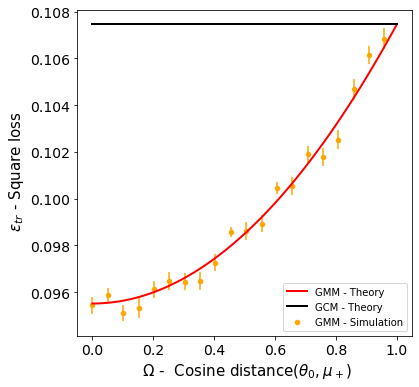

In [12]:
fig, ax = plt.subplots(figsize = (6,6))

ts = np.linspace(0,1,100) 
rep_gmm = rep_gmm_minus + rep_gmm_plus 
rep_gmm['test_error'] = rep_gmm['test_error']*0.5 
rep_gmm['train_loss'] = rep_gmm['train_loss']*0.5 
rep_gmm['sample_complexity'] = rep_gmm['sample_complexity']*0.5 
rep_gmm['interp_param'] = ts ; rep_gcm['interp_param'] = ts ; simulation_gmm['interp_param'] = omegas_gem
rep_gmm.plot(x='interp_param', y='train_loss', style='-', ax=ax, label='GMM - Theory ',color = 'r',linewidth = 2)
rep_gcm.plot(x='interp_param', y='train_loss', style='-', ax=ax, label='GCM - Theory',color = 'black',linewidth = 2)
simulation_gmm.plot(x='interp_param', y='train_loss', yerr = 'train_loss_std',style='-', ax=ax, kind = 'scatter', label='GMM - Simulation',color = 'orange')

ax.set_ylabel(r" $\varepsilon_{tr}$ - Square loss",fontsize = 15)
ax.set_xlabel(r' $\Omega$ -  Cosine distance$(\theta_0,\mu_+)$',fontsize = 15 )
ax.tick_params(labelsize=14) 

When the learning task is correlated with the data structure we **break** Gaussian universality 